<a href="https://colab.research.google.com/github/SahilPatki30082002/OTSU-Thresholding/blob/main/OTSU_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim: Perform OTSU THresholding, and display results in graph

#Collab Notebook Link: https://colab.research.google.com/drive/1n6J6x25wWz7MuCrM9OvwojPrqs-iovSp?usp=sharing

# Import Calls

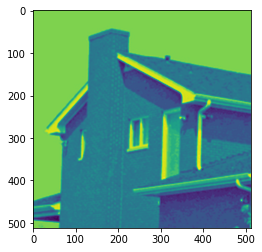

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import cv2

import warnings
warnings.filterwarnings("ignore")

img = cv2.imread("/content/house.tif", 0)
plt.imshow(img)

In [ ]:
print(img)

[[203 203 203 ... 203 203 203]
 [203 203 203 ... 203 203 203]
 [204 204 204 ... 204 204 204]
 ...
 [201 202 203 ... 122 153 162]
 [194 198 202 ... 123 154 162]
 [189 194 201 ... 125 155 163]]


In [ ]:
img.shape

(512, 512)

In [ ]:
max = np.max(img)
max

254

#Program Functions

In [ ]:
def histogram_printer(img):
  r=img.shape[0]
  c=img.shape[1]
  hist_data = {}
  for i in range(r):
    for j in range(c):
      if (img[i][j] in hist_data):
        hist_data[img[i][j]] += 1
      else:
        hist_data[img[i][j]] = 1
  for i in range(255):
    if (i not in hist_data):
      hist_data[i] = 0
  plt.stem(list(hist_data.keys()),list(hist_data.values()))

##Global Thresholding

Text(0.5, 1.0, 'Original Image Histogram')

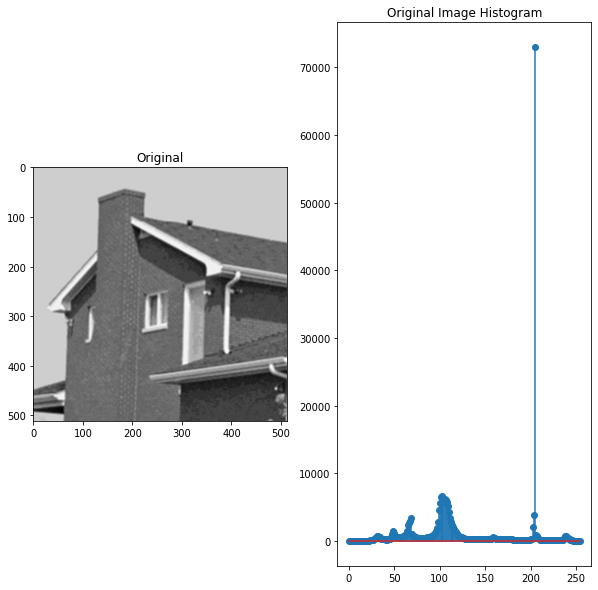

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(1,2,2)
histogram_printer(img)
plt.title('Original Image Histogram')

In [ ]:
#Thresholding
threshold = 150
# threshold = int(input('Enter Threshold value: '))

In [ ]:
m,n = img.shape
max = np.max(img)

globalThresholdImg = np.zeros((m, n))
for i in range(0,m):
  for j in range(0,n):
    if(img[i][j] > threshold):
      globalThresholdImg[i][j] = max - 1
    else:
      globalThresholdImg[i][j] = 0

print(globalThresholdImg)
# plt.imshow(globalThresholdImg, cmap='gray')

[[253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]
 [253. 253. 253. ... 253. 253. 253.]
 ...
 [253. 253. 253. ...   0. 253. 253.]
 [253. 253. 253. ...   0. 253. 253.]
 [253. 253. 253. ...   0. 253. 253.]]


Text(0.5, 1.0, 'Global Threshold Image Histogram')

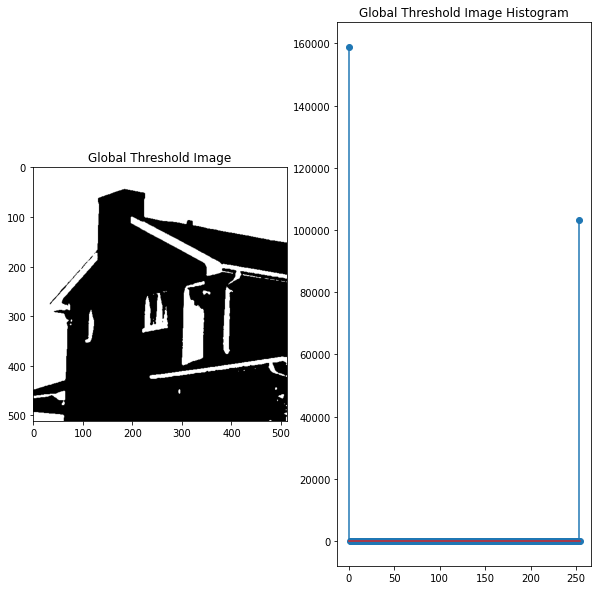

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(globalThresholdImg, cmap = 'gray')
plt.title('Global Threshold Image')
plt.subplot(1,2,2)
histogram_printer(globalThresholdImg)
plt.title('Global Threshold Image Histogram')

Text(0.5, 1.0, 'Simple Thresholding Image')

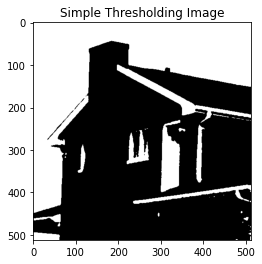

In [ ]:
#Simple Thresholding

simpleThresholding = np.where(img > threshold, 255, 0)
plt.imshow(simpleThresholding, cmap = 'gray')
plt.title('Simple Thresholding Image')

Text(0.5, 1.0, 'Simple Thresholding Image Histogram')

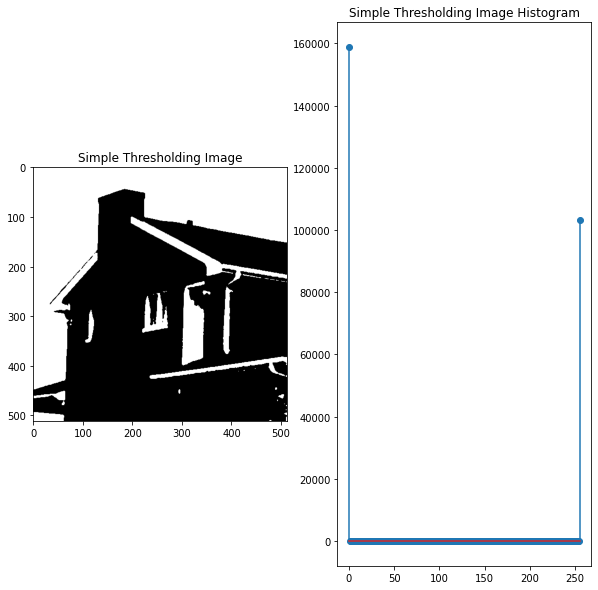

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(simpleThresholding, cmap = 'gray')
plt.title('Simple Thresholding Image')
plt.subplot(1,2,2)
histogram_printer(simpleThresholding)
plt.title('Simple Thresholding Image Histogram')

Text(0.5, 1.0, 'Global Threshold Image')

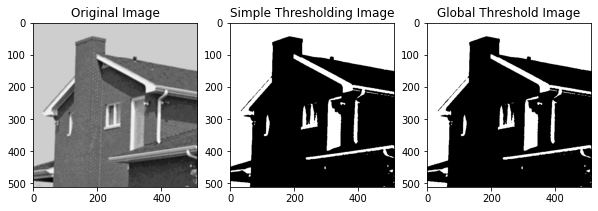

In [ ]:
#subplots

fig = plt.figure(figsize = (10, 10))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(simpleThresholding, cmap = 'gray')
plt.title('Simple Thresholding Image')
plt.subplot(1,3,3)
plt.imshow(globalThresholdImg, cmap = 'gray')
plt.title('Global Threshold Image')

##Adaptive Thresholding


In [ ]:
mask = 9  #size of mask

#Function Defination for Adaptive Mean Thresholding

def adaptiveThresholding(img1, mask):
  img2 = img1.copy()
  skip = mask//2        #Leaving the boundary pixels
  m, n = img1.shape

  for i in range(skip, m - skip, mask):
    for j in range(skip, n - skip, mask):
      temp = img1[i - skip : i + skip + 1, j - skip: j + skip +1]        #regional matrix
      temp1 = np.mean(temp) - 0                                            #mean
      temp2 = np.where(temp > temp1, 255, 0)                             #thresholded regional matrix    
      img2[i - skip : i + skip + 1, j - skip: j + skip +1] = temp2 
      
  
  return img2

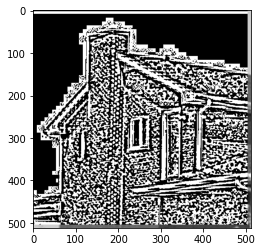

In [ ]:
im1 = adaptiveThresholding(img, mask)
plt.imshow(im1, cmap = 'gray')

In [ ]:
print(im1)

[[  0   0   0 ... 203 203 203]
 [  0   0   0 ... 203 203 203]
 [  0   0   0 ... 204 204 204]
 ...
 [201 202 203 ... 122 153 162]
 [194 198 202 ... 123 154 162]
 [189 194 201 ... 125 155 163]]


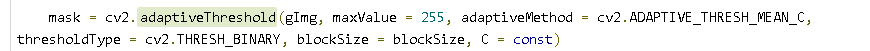

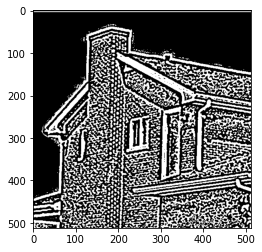

In [ ]:
# Apply adaptive threshold
th3 = cv2.adaptiveThreshold(img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 9, C = 0)
th4 = cv2.adaptiveThreshold(img, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 3, C = 0)

# Display the result
plt.imshow(th3, cmap = 'gray')

Text(0.5, 1.0, 'Adaptive Mean Thresholded Image - OpenCV')

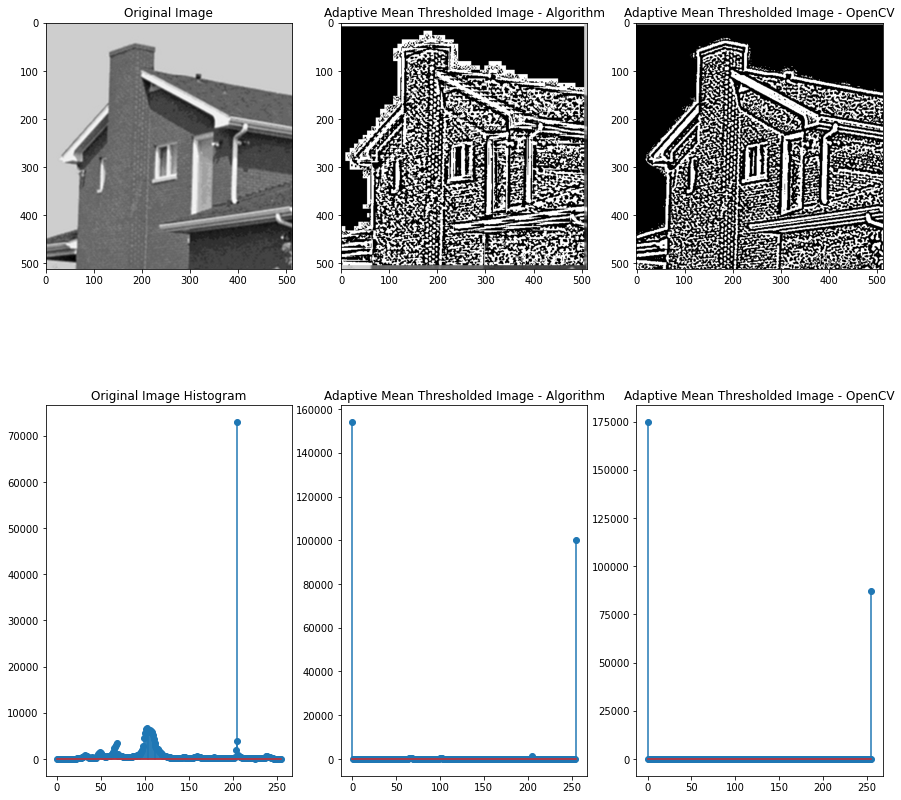

In [ ]:
#Subplot

fig = plt.figure(figsize = (15, 15))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(im1, cmap = 'gray')
plt.title('Adaptive Mean Thresholded Image - Algorithm')
plt.subplot(2,3,3)
plt.imshow(th3, cmap = 'gray')
plt.title('Adaptive Mean Thresholded Image - OpenCV')

plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
histogram_printer(im1)
plt.title('Adaptive Mean Thresholded Image - Algorithm')
plt.subplot(2,3,6)
histogram_printer(th3)
plt.title('Adaptive Mean Thresholded Image - OpenCV')

In [ ]:
print(th3)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]]


##OTSU METHOD - INBUILT


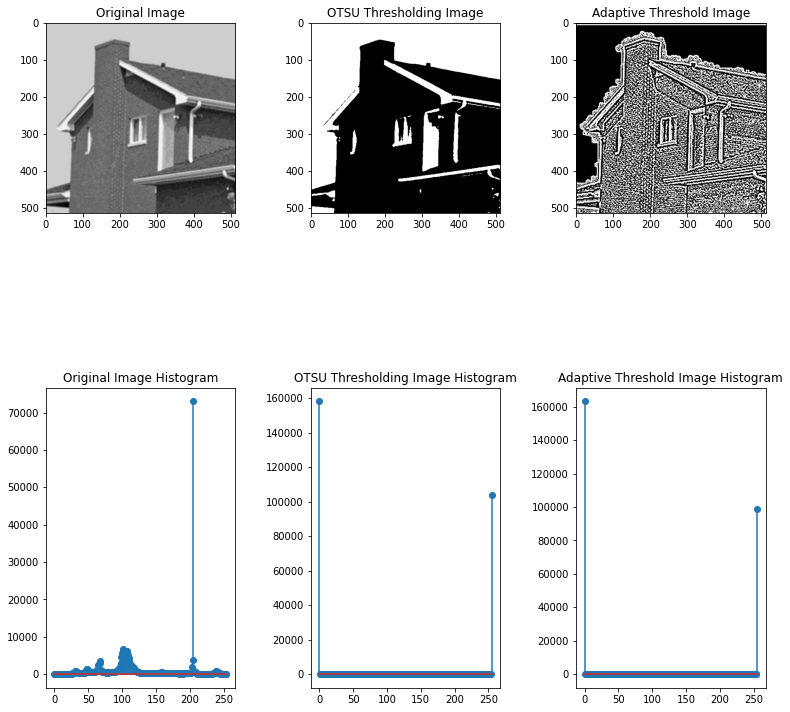

In [ ]:
#Otsu using inbuilt

import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local

# image = data.page()

otsu_thresh = threshold_otsu(img)
binary_otsu = np.where(img > otsu_thresh, 255,0)

block_size = 5
adaptive_thresh = threshold_local(img, block_size, offset=0)
binary_adaptive = np.where(img > adaptive_thresh, 255,0)

fig = plt.figure(figsize = (10, 10))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(binary_otsu, cmap = 'gray')
plt.title('OTSU Thresholding Image')
plt.subplot(2,3,3)
plt.imshow(binary_adaptive, cmap = 'gray')
plt.title('Adaptive Threshold Image')
plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
histogram_printer(binary_otsu)
plt.title('OTSU Thresholding Image Histogram')
plt.subplot(2,3,6)
histogram_printer(binary_adaptive)
plt.title('Adaptive Threshold Image Histogram')

plt.subplots_adjust(left=4,
                    bottom=1, 
                    right=5, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)

In [ ]:
print("Thresholds:")
print("OTSU Threshold:", otsu_thresh)
print("Adaptive Threshold:", adaptive_thresh)

Thresholds:
OTSU Threshold: 147
Adaptive Threshold: [[203.00671762 203.00671762 203.00671762 ... 203.00671762 203.00671762
  203.00671762]
 [203.20755561 203.20755561 203.20755561 ... 203.20755561 203.20755561
  203.20755561]
 [204.         204.         204.         ... 204.         204.
  204.        ]
 ...
 [200.31773318 201.54730103 202.87215284 ... 120.99988747 148.88844441
  160.40591727]
 [195.18885958 198.10091894 201.43237597 ... 121.86129282 149.2236477
  160.30508601]
 [191.11780837 195.18753905 200.27873183 ... 123.16267296 150.07856822
  160.92757218]]


##OTSU - ALGORITHM

In [ ]:
#Otsu's Method
'''
def otsu1(img1):
   r, c = img1.shape
   #print(r)
   #print(c)
   least_variance = -1
   least_variance_threshold = -1

   total = (r * c)
   #print(total)
   thres_vals = np.arange(np.min(img1), np.max(img1))
   #print(thres_vals)
   variance = []
   threshold = []

   for value in thres_vals:
     bgimage = []
     fgimage = []

     for i in range(0, r):
       for j in range(0, c):
         if img1[i,j] >= value:
           fgimage.append(img1[i,j])
           #print(bgimage)
         else:
           bgimage.append(img1[i,j])
  
     bglen = len(bgimage)
     fglen = len(fgimage)

     bgweight = bglen/total
     fgweight = fglen/total

     bgmean = sum(bgimage)/bglen
     fgmean = sum(fgimage)/fglen

     for i in range(0, bglen):
       bgs = 0
       bgs = bgs + ((bgimage[i] - bgmean)**2 / bglen)
      
     for j in range(0, fglen):
       fgs = 0
       fgs = fgs + ((fgimage[j] - fgmean)**2 / fglen)

     varianceoft = (bgweight * bgs) + (fgweight * fgs)
     if least_variance == -1 or least_variance > varianceoft:
            least_variance = varianceoft
            least_variance_threshold = value
     #print("trace:",varianceoft, value)

   return least_variance_threshold'''

In [ ]:
'''thresh = otsu1(img)
im2 = np.where(img > thresh, 255, 0) 

#im2 = otsuThresholding(img, mask)
plt.imshow(im2, cmap = 'gray')'''

In [ ]:
def otsu(img1):
  nbins = 0.1         #Added this to tackle the zero threshold value
  least_variance = -1
  least_variance_threshold = -1
  flattenimg = img1.flatten() #Convert 2d to 1d array
  weight = len(flattenimg)  #Total no. of pixels

  thres_vals = np.arange(np.min(img1) + nbins , np.max(img1) - nbins, nbins)  #Range of threshold values
  #print(thres_vals)

  for value in thres_vals:
    bgimage = flattenimg[flattenimg < value]
    bgweight = len(bgimage) / weight
    bgvariance = np.var(bgimage)

    fgimage = flattenimg[flattenimg >= value]
    fgweight = len(fgimage) / weight
    fgvariance = np.var(fgimage)

    varianceofvalue = (bgweight * bgvariance) + (fgweight * fgvariance)
    if least_variance == -1 or least_variance > varianceofvalue:
      least_variance = varianceofvalue
      least_variance_threshold = value
    #print("trace:",varianceofvalue, value)

  return least_variance_threshold

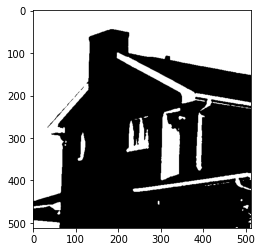

In [ ]:
thresh = otsu(img)
image = np.where(img > thresh, 255, 0) 
plt.imshow(image, cmap = 'gray')

Text(0.5, 1.0, 'OTSU Thresholded Image - OpenCV')

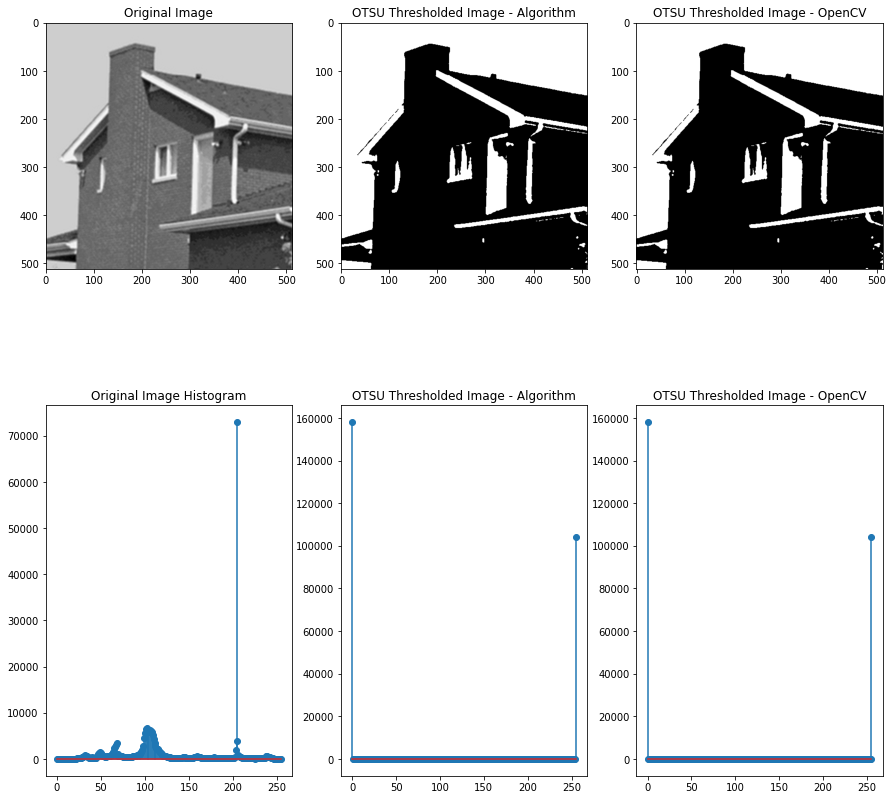

In [ ]:
#Subplot

fig = plt.figure(figsize = (15, 15))
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(image, cmap = 'gray')
plt.title('OTSU Thresholded Image - Algorithm')
plt.subplot(2,3,3)
plt.imshow(binary_otsu, cmap = 'gray')
plt.title('OTSU Thresholded Image - OpenCV')

plt.subplot(2,3,4)
histogram_printer(img)
plt.title('Original Image Histogram')
plt.subplot(2,3,5)
histogram_printer(image)
plt.title('OTSU Thresholded Image - Algorithm')
plt.subplot(2,3,6)
histogram_printer(binary_otsu)
plt.title('OTSU Thresholded Image - OpenCV')